# Beverage Logo Classifier:

- Program description:
    - This program uses a dataset that I created on my own with images taken on my phone. I used the square filter on the camera to ensure all images are reducable to 40x40 pixels without extra cropping. The training set has 100+ images of beverage bottles/cans belonging to 5 different brands (at least 20 of each). The test set has an additional 25+ pictures (at least 5 of each).
        1. Starbucks energy drink (can)
        2. Monster energy (can)
        3. Silk milk  (carton)
        4. Bon & Viv (can)
        5. Pure Leaf tea (bottle)


- Tools and methods
    - I use pillow to process all the images. Their starting size in the 'raw' folder is 320x320 pixels.  I scale them down by a factor of 10 and convert each to PNG format. The new images are all stored in a thumbnail folder to use for the rest of the program. 
    - To covert to arrays I read the files back in and stored all of their data in an array used matplotlip


# Import Libraries

this program makes use of matplotlib, pillow, and numpy to import and format all the images

In [1]:
%matplotlib inline
import keras
import PIL
from numpy import asarray

Using TensorFlow backend.


# Open and Show single image

An image is opened with matplotlib.  It is displayed on the screen to show an example of the original training data

uint8
(320, 320, 3)


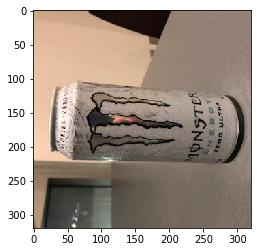

In [3]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('rawtrainimages/mon26.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

# Resize All images to 32x32 thumbnail

both the training and test sets are reformatted to a thumbnail verison of the original picture.  I did not want to overwrite the original images, so the thumbnails are stored in a separate file starting with "new"

In [4]:
from PIL import Image 
from os import listdir #This method returns a list containing the names of the entries in the directory given by path.

size = 40, 40

##Testing Data
loaded_images = list()
for filename in listdir('rawtestimages'): 
    image = Image.open('rawtestimages/' + filename) 
    image = image.convert('RGB') #switch out of RGBA mode
    image.thumbnail(size)
    image.save('testthumbnails/'+filename + ".PNG", "PNG")  
    cropped = Image.open('testthumbnails/'+filename + ".PNG")
    print(cropped.size)
    
## TRAINING DATA
loaded_images = list()
for filename in listdir('rawtrainimages'): #loop through all internet images
    image = Image.open('rawtrainimages/' + filename) #get the original internet file
    image = image.convert('RGB') #switch out of RGBA mode
    image.thumbnail(size)
    image.save('trainthumbnails/'+filename + ".PNG", "PNG")  

(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)


# Create data sets
 
Both X and Y data sets are created within these sections.  All test images (that are appropriately sized) are read into a list and their category is stored in a separate list.  The name of the file is used to categorize the image.  For example, all starbucks products are named sb#, so if it contians sb it belongs to category 1. By using the same loop, the file and category indecies should match.

In [5]:
from matplotlib import image
test_images = list() #create empty list
test_data = list()
for filename in listdir('testthumbnails'): #run loop of all images to store in list
    img_data = image.imread('testthumbnails/' + filename) # load image using matplotlib
    test_images.append(img_data) # store loaded image
    print('> loaded %s %s' % (filename, img_data.shape)) #print to confirm 
    #add classifier to the y-data
    if "sb" in filename:
        test_data.append(1)
    elif "mon" in filename:
        test_data.append(2)
    elif "silk" in filename:
        test_data.append(3)
    elif "bv" in filename:
        test_data.append(4)
    elif "pl" in filename:
        test_data.append(5)

> loaded bv1.jpg.PNG (40, 40, 3)
> loaded bv2.jpg.PNG (40, 40, 3)
> loaded bv3.jpg.PNG (40, 40, 3)
> loaded bv4.jpg.PNG (40, 40, 3)
> loaded bv5.jpg.PNG (40, 40, 3)
> loaded mon1.jpg.PNG (40, 40, 3)
> loaded mon2.jpg.PNG (40, 40, 3)
> loaded mon3.jpg.PNG (40, 40, 3)
> loaded mon4.jpg.PNG (40, 40, 3)
> loaded mon5.jpg.PNG (40, 40, 3)
> loaded mon6.jpg.PNG (40, 40, 3)
> loaded mon7.jpg.PNG (40, 40, 3)
> loaded mon8.jpg.PNG (40, 40, 3)
> loaded mon9.jpg.PNG (40, 40, 3)
> loaded pl1.jpg.PNG (40, 40, 3)
> loaded pl2.jpg.PNG (40, 40, 3)
> loaded pl3.jpg.PNG (40, 40, 3)
> loaded pl4.jpg.PNG (40, 40, 3)
> loaded pl5.jpg.PNG (40, 40, 3)
> loaded sb1.jpg.PNG (40, 40, 3)
> loaded sb2.jpg.PNG (40, 40, 3)
> loaded sb3.jpg.PNG (40, 40, 3)
> loaded sb4.jpg.PNG (40, 40, 3)
> loaded sb5.jpg.PNG (40, 40, 3)
> loaded silk1.jpg.PNG (40, 40, 3)
> loaded silk2.jpg.PNG (40, 40, 3)
> loaded silk3.jpg.PNG (40, 40, 3)
> loaded silk4.jpg.PNG (40, 40, 3)
> loaded silk5.jpg.PNG (40, 40, 3)


In [6]:
from matplotlib import image
train_images = list() #create empty list
train_data = list()
for filename in listdir('trainthumbnails'): 
    #store image data in list (x)
    img_data = image.imread('trainthumbnails/' + filename)
    train_images.append(img_data) # store loaded image
    #print('> loaded %s %s' % (filename, img_data.shape))
    
    #add classifier value based on name (y)
    if "sb" in filename:
        train_data.append(1)
    elif "mon" in filename:
        train_data.append(2)
    elif "silk" in filename:
        train_data.append(3)
    elif "bv" in filename:
        train_data.append(4)
    elif "pl" in filename:
        train_data.append(5)

> loaded bv1.jpg.PNG (40, 40, 3)
> loaded bv10.jpg.PNG (40, 40, 3)
> loaded bv11.jpg.PNG (40, 40, 3)
> loaded bv12.jpg.PNG (40, 40, 3)
> loaded bv13.jpg.PNG (40, 40, 3)
> loaded bv14.jpg.PNG (40, 40, 3)
> loaded bv15.jpg.PNG (40, 40, 3)
> loaded bv16.jpg.PNG (40, 40, 3)
> loaded bv17.jpg.PNG (40, 40, 3)
> loaded bv18.jpg.PNG (40, 40, 3)
> loaded bv19.jpg.PNG (40, 40, 3)
> loaded bv2.jpg.PNG (40, 40, 3)
> loaded bv20.jpg.PNG (40, 40, 3)
> loaded bv3.jpg.PNG (40, 40, 3)
> loaded bv4.jpg.PNG (40, 40, 3)
> loaded bv5.jpg.PNG (40, 40, 3)
> loaded bv6.jpg.PNG (40, 40, 3)
> loaded bv7.jpg.PNG (40, 40, 3)
> loaded bv8.jpg.PNG (40, 40, 3)
> loaded bv9.jpg.PNG (40, 40, 3)
> loaded mon1.jpg.PNG (40, 40, 3)
> loaded mon10.jpg.PNG (40, 40, 3)
> loaded mon11.jpg.PNG (40, 40, 3)
> loaded mon12.jpg.PNG (40, 40, 3)
> loaded mon13.jpg.PNG (40, 40, 3)
> loaded mon14.jpg.PNG (40, 40, 3)
> loaded mon15.jpg.PNG (40, 40, 3)
> loaded mon16.jpg.PNG (40, 40, 3)
> loaded mon17.jpg.PNG (40, 40, 3)
> loaded mon18.

# Load the data set 

All the data needs to be in numpy arrays for the rest of the program to run through the model
- x_train (the variable that contains the images to train on)
- y_train (the variable that contains the labels of the images in the training set)
- x_test (the variable that contains the images to test on), 
- y_test (the variable that contains the labels of the images in the test set).

In [7]:
import numpy as np
#load data into sets for creating the model
x_train = np.array(train_images)
y_train = np.array(train_data)
x_test = np.array(test_images)
y_test = np.array(test_data)

# Get the shape 

- The shape of the x_train data set is a 4-Dimensional array with 100 rows of 32 x 32 pixel image with depth = 3 (RGB)
- The y_train data shape is a 2-Dimensional array with 100 rows and 1 column. 
- The shape of the x_test data set is a 4-Dimensional array with 25 rows of 32 x 32 pixel image with depth = 3 (RGB). 
- The y_test data shape is a 2-Dimensional array with 25 rows and 1 column.

In [8]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (108, 40, 40, 3)
y_train shape: (108,)
x_test shape: (29, 40, 40, 3)
y_test shape: (29,)


# Visualize sample Data

The following sections take a look at the first image (at index=0) in the training data set as a numpy array. 

First, it is shown as an array of of pixel values, then it is shown in the image form along with it's label.

There are 5 categories so the label represent the specific category within the 5 types. 

In [9]:
x_train[0]

array([[[0.15686275, 0.12941177, 0.09411765],
        [0.28627452, 0.23137255, 0.14509805],
        [0.32156864, 0.27058825, 0.16862746],
        ...,
        [0.28627452, 0.10980392, 0.12156863],
        [0.24705882, 0.09803922, 0.10588235],
        [0.20784314, 0.08235294, 0.09803922]],

       [[0.14117648, 0.1254902 , 0.08627451],
        [0.2784314 , 0.22745098, 0.14117648],
        [0.31764707, 0.25882354, 0.15686275],
        ...,
        [0.24705882, 0.09019608, 0.10588235],
        [0.19607843, 0.07450981, 0.08627451],
        [0.2       , 0.07450981, 0.09019608]],

       [[0.14509805, 0.12941177, 0.09019608],
        [0.27058825, 0.22745098, 0.14117648],
        [0.23921569, 0.2627451 , 0.17254902],
        ...,
        [0.24705882, 0.09019608, 0.10588235],
        [0.24313726, 0.09803922, 0.10588235],
        [0.21176471, 0.08627451, 0.09019608]],

       ...,

       [[0.3137255 , 0.2784314 , 0.21176471],
        [0.3254902 , 0.2901961 , 0.22352941],
        [0.3254902 , 0

# Show reformated image

The same image from before is displayed again to show the changes in format and the label is printed to confirm the y-data was correct

The label is: 3


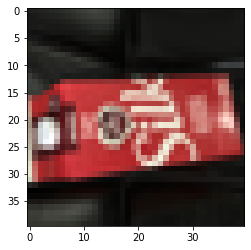

In [37]:
import matplotlib.pyplot as plt
imageVal = 94
img = plt.imshow(x_train[imageVal])
print('The label is:', y_train[imageVal])

# Normalizing the Data

First, we use One-Hot Encoding to convert the labels into a set of 10 numbers to input into the neural network. 
The numbers of course corresponds with the number of labels to classify the images.

Then, the pixels are normalized to be either 0 or 1 instead of a value between 0-255

In [38]:
from keras.utils import to_categorical
from keras.utils import np_utils

# One hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot)

# normalize colors which are 0-255 to 0.0-1.0
X_train = x_train.astype('float32')
X_train = X_train / 255.0

X_test = x_test.astype('float32')
X_test = X_test / 255.0

# encode outputs for manipulation by encoding into a binary matrix
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0.

# Creating the CNN

To build the model we need to create the architecture using Sequential()

In [39]:
from keras.models import Sequential
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

model = Sequential()

#  Building the CNN
The CNN is built through a series of 19 steps.  These include a mixture of convolutional, dropout, and max pooling layers which are flattened and run through neural networks to define the structure. 


Convolutional layer: 
    - We add the first layer, a convolution layer to extract features from the input image, and create 32, 5 x 5 ReLu convoluted features also known as feature maps. 
    - For the first layer we must input the dimension shape which is a 64 x 64 pixel image with depth = 3 (RGB). 
    - All other layers do not have an input parameter

Dropout:
     - This is a technique where randomly selected neurons are ignored during training.
     - The effect is that the network becomes less sensitive to the specific weights of neurons

Max Pooling Layer: 
    - Add the  pooling layer with a 2 x 2 pixel filter to get the max element from the feature maps. 
    - This reduces the dimension of the feature maps by half and is also known as sub sampling.

Flattening layer:
    - Used to reduce the image to a linear array also known as a one 1-Dimension vector
    - Vector feeds into and connects with the neural network
    
Neural Network (dense):
    - NN with first layer of 1024 neurons and the activation function ReLu
    - Second has 512 and final has just 3

In [40]:
#1. Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(32, (3, 3), input_shape=(40, 40, 3), activation='relu', padding='same'))

#2. Dropout Layer at 20%
model.add(Dropout(.2))

#3. Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

#4. Max Pool layer with size 2×2.
model.add(MaxPooling2D())

#5. Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

#6. Dropout layer at 20%.
model.add(Dropout(.2))

#7. Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

#8. Max Pool layer with size 2×2.
model.add(MaxPooling2D())

#9. Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

#10. Dropout layer at 20%
model.add(Dropout(.2))

#11. Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

#12. Max Pool layer with size 2×2.
model.add(MaxPooling2D())

#13. Flatten layer.
model.add(Flatten())

#14. Dropout layer at 20%
model.add(Dropout(0.2))

#15. Fully connected layer with 1,024 units and a rectifier activation function
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))

#16. Dropout layer at 20%
model.add(Dropout(.2))

#17. Fully connected layer with 512 units and a rectifier activation function
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))

#18. Dropout layer at 20%
model.add(Dropout(.2))

#19. Fully connected output layer with 10 units and a softmax activation function
model.add(Dense(y_test.shape[1], activation='softmax')) #19




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



# Compile the CNN

Finally, the model is compiled.  Give it the categorical_crossentropy loss function which is used for classes greater than 2, the adam optimizer, and the accuracy of the model.

In [41]:
# Compile
epochs = 75
lrate = 0.03

#set decay to lrate over epochs
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#print modle summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 40, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        36928     
________

# Train the model using the fit() method, which is another word for train. 
#We will train the model on the training data with batch size =256, epochs =10, and split the data into training on 70% of the data and using the other 30% as validation. Training may take some time to finish.

In [42]:
# Fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 108 samples, validate on 29 samples
Epoch 1/75
108/108 [==============================] - 2s 22ms/step - loss: 1.7911 - acc: 0.1944 - val_loss: 1.7843 - val_acc: 0.3103
Epoch 2/75
108/108 [==============================] - 1s 8ms/step - loss: 1.7827 - acc: 0.2593 - val_loss: 1.7675 - val_acc: 0.3103
Epoch 3/75
108/108 [==============================] - 1s 8ms/step - loss: 1.7660 - acc: 0.2593 - val_loss: 1.7450 - val_acc: 0.3103
Epoch 4/75
108/108 [==============================] - 1s 8ms/step - loss: 1.7471 - acc: 0.2593 - val_loss: 1.7187 - val_acc: 0.3103
Epoch 5/75
108/108 [==============================] - 1s 8ms/step - loss: 1.7250 - acc: 0.2593 - val_loss: 1.6922 - val_acc: 0.3103
Epoch 6/75
108/108 [==============================] - 1s 8ms/step - loss: 1.7039 - acc: 0.2593 - val_loss: 1.6670 - val_acc: 0.3103
Epoch 7/75
108/108 [==============================] - 1s 8ms/step - 

Epoch 60/75
108/108 [==============================] - 1s 9ms/step - loss: 1.5989 - acc: 0.2593 - val_loss: 1.5832 - val_acc: 0.3103
Epoch 61/75
108/108 [==============================] - 1s 9ms/step - loss: 1.6193 - acc: 0.2593 - val_loss: 1.5827 - val_acc: 0.3103
Epoch 62/75
108/108 [==============================] - 1s 9ms/step - loss: 1.6013 - acc: 0.2593 - val_loss: 1.5832 - val_acc: 0.3103
Epoch 63/75
108/108 [==============================] - 1s 8ms/step - loss: 1.6114 - acc: 0.2593 - val_loss: 1.5847 - val_acc: 0.3103
Epoch 64/75
108/108 [==============================] - 1s 9ms/step - loss: 1.6041 - acc: 0.2685 - val_loss: 1.5871 - val_acc: 0.3103
Epoch 65/75
108/108 [==============================] - 1s 8ms/step - loss: 1.6097 - acc: 0.2778 - val_loss: 1.5905 - val_acc: 0.3103
Epoch 66/75
108/108 [==============================] - 1s 8ms/step - loss: 1.6068 - acc: 0.2500 - val_loss: 1.5909 - val_acc: 0.3103
Epoch 67/75
108/108 [==============================] - 1s 9ms/step - 

# Get the model's accuracy on the test data.

In [43]:
scores = model.evaluate(x_test, y_test_one_hot)[1]
print("Accuracy: ")
print(scores)

29/29 [==============================] - 0s 2ms/step
Accuracy: 
0.3103448152542114


# Visualize the model's accuracy for both the training and validation data.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


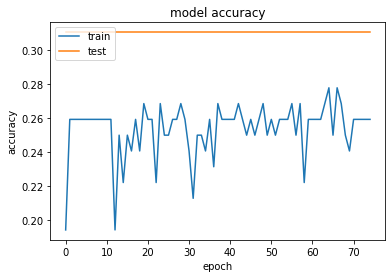

In [44]:
import matplotlib.pyplot as plt
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualize the models loss for both the training and validation data.

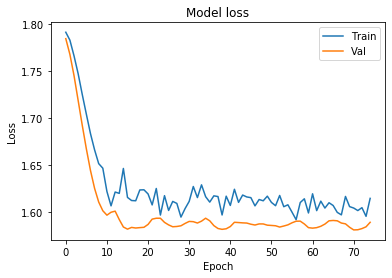

In [45]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# GUI Creation and CNN Test

I created a GUI to understand how CNNs can be used after they are generated and optimized.  My GUI contains a window with a text entry for typing a file name (assumed to be in the same working directory) and a button to run the program.  The function that is called will locate the file, transform it into the right format, and then run it through to predict the logo

Because I hard-coded the GUI to search within the directory named GUIimages, there are only a few images you can type in for now. including "mon4.jpg" "bv8.jpg" and "silk3.jpg"

- Note: I've experienced some bugs when opening the GUI for the first time.  The last segment may need to be tried twice to get the display correct. 


In [46]:
import numpy as np
from matplotlib import image
from PIL import Image 
from tkinter import *
window=Tk()

In [47]:
##All elements go here
class MyWindow:
    def __init__(self, win):
        #label and text entry for file input
        self.lbl1=Label(win, text='File Name')
        self.lbl1.place(x=100, y=50)
        self.t1=Entry(bd=3)
        self.t1.place(x=200, y=50)
        
        #submit button to run program
        self.btn1 = Button(win, text='file name')
        self.b1=Button(win, text='Run CNN', command=self.run)
        self.b1.place(x=100, y=150)
        
        #Label and entry for result
        self.lbl2=Label(win, text='Result')
        self.lbl2.place(x=100, y=200)
        self.t2=Entry()
        self.t2.place(x=200, y=200)    
        
    def run(self):
        self.t2.delete(0, 'end')
        #get the image name from input
        inputimage = self.t1.get()
        
        #locate the image and reformat to PNG of size 32x32
        from PIL import Image 
        image = Image.open('GUIimages/' + inputimage) #get the original internet file
        image = image.convert('RGB') #switch out of RGBA mode
        image.thumbnail(size) #resize to 32x32
        image.save('GUIimages/'+inputimage + ".PNG", "PNG") 
       
        from matplotlib import image
        img_data = image.imread('GUIimages/' + inputimage+ ".PNG") # load image using matplotlib
        X = img_data.astype('float32')
        X = X / 255.0
        img = np.expand_dims(X, axis=0)
        
        #run the image through the mdoel
        print(model.predict(img))
        prediction = model.predict(img)

        #find maximum prediction value
        maxElement = np.amax(prediction)
        index = np.where(prediction == maxElement)
        print(index)
         
        #set result
        if index[0]==0:
            result = 'Starbucks'
        elif index[0]==1:
            result = 'Monster'
        elif index[0]==2:
            result = 'Silk'
        elif index[0]==2:
            result = 'Bon & Viv'
        else:
            result = 'Pure Leaf'
        
        self.t2.insert(END, str(result))

In [49]:
##Run and display window
window=Tk()
mywin=MyWindow(window)
window.title('Logo Classifier CNN')
window.geometry("400x300+10+10")
window.mainloop()

# Conclusion

The model did not perform with high accuracy, as seen in the graphs, due to   this is due to the extremely small sample size of images.  Normal data sets will have several thousand images for each category but I made this on my own with 25 of each category.  For the purposes of this project, the accuracy is less important than the implementation and method. I've learned a lot about manipulating images and creating CNNs, so I could improve this in the future knowing what I now know. For example, by adding several more pictures of the Monster Energy cans and increasing picture resolution to 40x40 (instead of 32x32) I was able to improve the accuracy by 6%. With additional photos the model could develop more accurate mappings of the logos and increase accuracy further.

# Future Applications

I decided to use logos for my CNN with the recycling industry in mind.  I could immagine a camera set up over the conveyor belts to scan for the patterns developed by the model and track the quantity of various products as they come in.  Companies will pay large amounts of money to receive data and it could help them to see where their products end up.  Companies could contribute to a large dataset with images of their products for the model to learn.  Then, within material recovery facilities, the products would pass through and a program would count as they are seen.  